https://www.youtube.com/watch?v=S7oA5C43Rbc&t=1681s

# Recurrent Neural Networks

## Why Sequence Models
- RNN 등의 시퀀스 모델을 사용해 음성 인식, 자연어 처리, 음악 생성 등 다양한 시퀀스 데이터 문제를 해결할 수 있다. 시퀀스 모델은 입력과 출력이 모두 시퀀스일 때나, 하나만 시퀀스일 때에도 적용 가능하다.

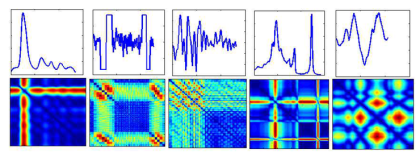

## Notation

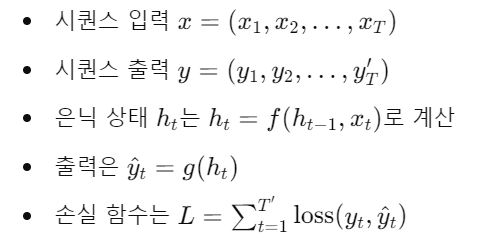

$$x^{(i) \langle t \rangle}$$는 입력 시퀀스의 \( i \)번째 샘플에서 \( t \)번째 시간 단계(단어 또는 데이터)를 나타낸다.

>  예시 데이터셋
- 예를 들어, 두 개의 문장이 주어진다고 하자:
1. 문장 1: "Harry Potter went to Hogwarts."
2. 문장 2: "Hermione Granger is very smart."

$$x^{(1) \langle t \rangle} , x^{(2) \langle t \rangle}$$

- **\( x^{(1) \langle 1 \rangle} \)**: 첫 번째 문장 "Harry Potter went to Hogwarts."의 첫 번째 단어인 **"Harry"**를 의미한다.
- **\( x^{(1) \langle 2 \rangle} \)**: 첫 번째 문장의 두 번째 단어인 **"Potter"**를 의미한다.
- **\( x^{(1) \langle 3 \rangle} \)**: 첫 번째 문장의 세 번째 단어인 **"went"**를 의미한다.

그리고 두 번째 문장에서는:

- **\( x^{(2) \langle 1 \rangle} \)**: 두 번째 문장 "Hermione Granger is very smart."의 첫 번째 단어인 **"Hermione"**를 의미한다.
- **\( x^{(2) \langle 2 \rangle} \)**: 두 번째 문장의 두 번째 단어인 **"Granger"**를 의미한다.
- **\( x^{(2) \langle 3 \rangle} \)**: 두 번째 문장의 세 번째 단어인 **"is"**를 의미한다.

> 이처럼 (i)는 **문장 번호(샘플)**를 나타내고, (t)는 그 문장 내에서의 **단어 순서(시간 단계)**를 나타낸다. RNN은 각 시간 단계에서 입력을 처리하며, 문장의 모든 단어에 대해 순차적으로 예측을 수행하게 된다.

따라서 이 표현에서 문장의 t번째 $$x^{<t>}$$
는 원-핫 벡터입니다. 원-핫one-hot인 이유는 딱 하나만 1이고 나머지는 0이기 때문이며 이 문장의 9개 단어를 나타내려면 9개가 있어야 하기 때문입니다.

목표는 이렇게 표현된 x를 시퀀스 모델을 사용하여 타깃 출력 y로 매핑하는 것을 학습하는 것입니다. 지도 학습 문제로 진행할 것이고 x와 y를 포함하는 데이터 테이블을 제공하겠습니다.

마지막으로 단어 집합에 없는 단어가 나오면 어떻게 할 것인가입니다. 답을 드리자면, 새로운 토큰 혹은 단어 집합에 없는 단어를 표현하기 위해 UNK로 표시되는 모르는 단어라 불리는 가짜 단어를 만들면 됩니다.

=> 왜 기존의 NN을 사용할 수 없을까?

1. 입력과 출력은 다른 길이와 다른 example이 될 수 있다.
2. 나이브 신경망 아키텍처는 텍스트의 서로 다른 위치에서 학습한 기능을 공유하지 않는다.
3. 파라미터가 너무 많다.

## Recurrent Neural Models

> **RNN(Recurrent Neural Network)**에서는 각 단계에서 사용하는 가중치 \( W \)는 **모든 시간 단계에서 동일**하다.

- **RNN의 구조**에서 시간 \( t \)마다 새로운 입력을 처리하지만, 각 시간 단계에서의 연산은 동일한 가중치 행렬을 사용하여 수행된다. 즉, 시간 단계마다 입력은 다르지만, **가중치 \( W_{aa}, W_{ax} \)**는 모든 시간 단계에서 공유된다.
- 이 공유된 가중치는 입력 시퀀스의 길이에 상관없이 네트워크가 일관된 패턴을 학습하게 해준다. 이는 네트워크가 시퀀스 데이터를 처리할 때 메모리와 계산량을 줄이기 위한 효율적인 방법이다.

### RNN의 가중치 구성
RNN의 가중치는 크게 세 가지로 나뉜다:
1. $$W_{ax}$$: 입력 \( x^{\langle t \rangle} \)와 현재 은닉 상태 \( h^{\langle t \rangle} \)를 연결하는 가중치.
2. $$W_{aa}$$ : 이전 시간 단계의 은닉 상태 \( h^{\langle t-1 \rangle} \)와 현재 은닉 상태 \( h^{\langle t \rangle} \)를 연결하는 가중치.
3. $$W_y$$: 은닉 상태에서 출력 \( y^{\langle t \rangle} \)를 예측하는 가중치.

이 가중치들은 모든 시간 단계에서 공유되며, 네트워크는 입력 시퀀스 전체에 걸쳐 학습된 패턴을 적용할 수 있게 된다. 이 특성 덕분에 RNN은 시퀀스 전체에서 패턴을 인식하고, 시간에 따른 데이터의 관계를 학습할 수 있다.

따라서, **RNN은 시간 단계에 상관없이 동일한 가중치를 사용**하며, 이를 통해 시퀀스 데이터의 시간 의존성을 모델링한다.

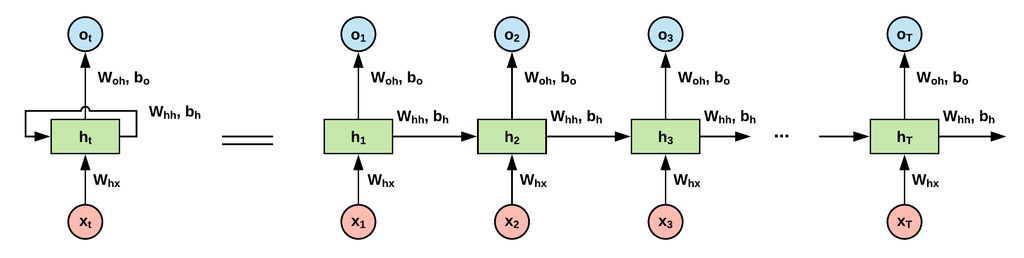

> **기본 순환 신경망(RNN, Recurrent Neural Network)**은 순차적 데이터(시계열 데이터, 텍스트, 오디오 등)를 처리하기 위해 고안된 신경망 구조이다. RNN은 데이터를 시간적인 순서로 처리하며, 이전 단계의 정보를 **은닉 상태(hidden state)**에 저장하고 이를 사용하여 다음 단계의 출력을 계산하는 방식으로 동작한다. RNN은 입력 간의 순차적 의존성을 모델링하는 데 매우 효과적이다.

-  RNN의 핵심 아이디어
순차 데이터 처리: RNN은 시퀀스 데이터를 시간 순서에 따라 처리하며, 각 입력이 시계열적으로 연결되어 있다는 가정을 반영한다. 시퀀스 데이터에서 시간의 흐름에 따른 패턴을 학습할 수 있다.

- 은닉 상태(hidden state): RNN은 은닉 상태라는 내부 메모리를 사용하여 이전 시간 단계에서 얻은 정보를 저장하고, 이를 다음 시간 단계의 계산에 사용한다. 이는 RNN이 이전 시점에서 발생한 정보를 기억하고 사용할 수 있게 한다.

#### **RNN의 기본 구조**


1. **입력 x_t** :
   - 시간 \( t \)에서의 입력 데이터이다. 예를 들어, 텍스트 데이터에서는 각 단어 또는 단어 임베딩 벡터가 될 수 있다.

2. **은닉 상태 \( h_t \)**:
   - 시간 \( t \)에서의 은닉 상태는 이전 시간 단계 \( t-1 \)에서의 은닉 상태와 현재 입력 \( x_t \)를 기반으로 계산된다. 이는 RNN이 시계열 데이터의 순차적인 정보를 기억하는 방법이다.
   
   수식으로 표현하면:
  
   $$h_t = f(W_h \cdot h_{t-1} + W_x \cdot x_t + b)$$
   - \( f \): 비선형 활성화 함수(주로 **tanh** 또는 **ReLU** 사용)이다.
   - \( W_h \): **은닉 상태에 대한 가중치 행렬**이다.
   - \( W_x \): **입력에 대한 가중치 행렬**이다.
   - \( b \): 편향 벡터이다.
   - \( h_{t-1} \): 이전 시간 단계의 은닉 상태이다.
   - \( x_t \): 현재 입력 값이다.

3. **출력 \( y_t \)**:
   - 시간 단계 \( t \)에서의 출력은 은닉 상태 \( h_t \)로부터 계산된다.
   \[
   y_t = g(W_y \cdot h_t + b_y)
   \]
   - \( g \): 출력에 대한 활성화 함수(예: 분류 문제에서는 softmax 사용)이다.
   - \( W_y \): 출력 가중치 행렬이다.
   - \( b_y \): 출력에 대한 편향 벡터이다.



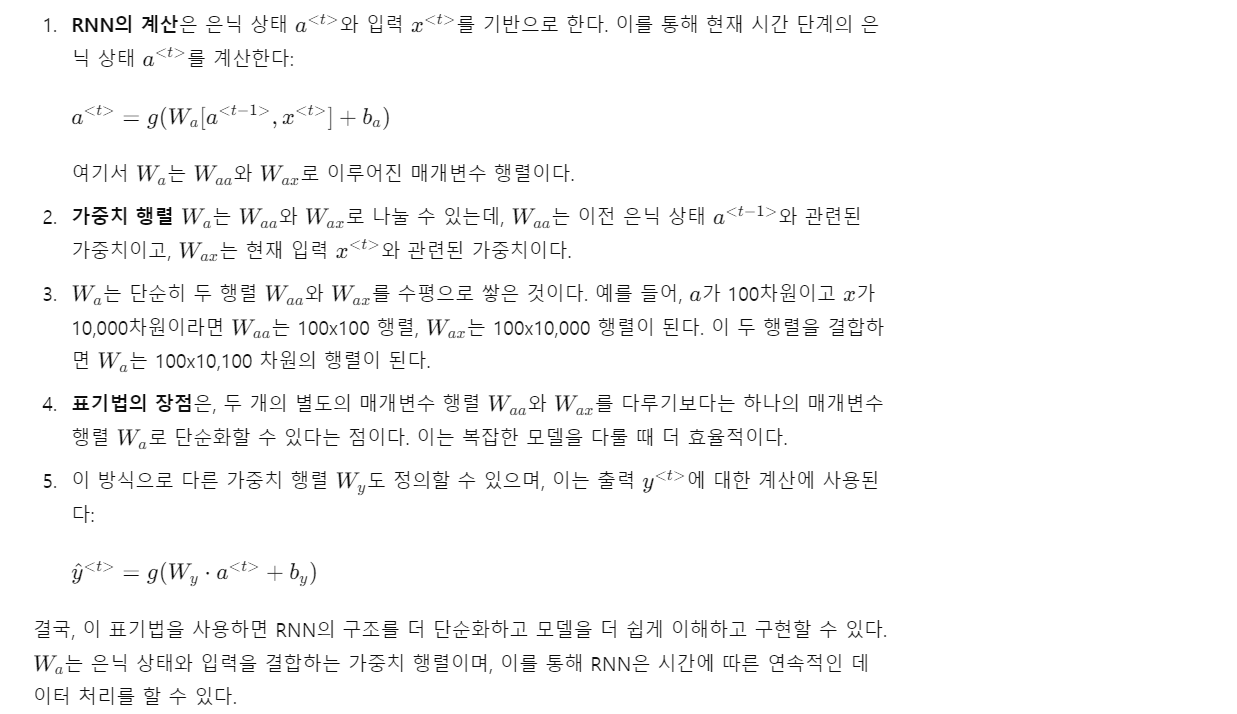

### Backpropagation Through Time

1. 순방향 전파: 각 시간 단계에서 은닉 상태와 출력을 계산한다.
2. 오차 계산: 마지막 시간 단계에서 출력과 실제 값 사이의 오차를 계산한다.
3. 역방향 전파: 시간 축을 따라 역방향으로 각 시간 단계에서 오차를 전파하며, 각 시간 단계의 가중치를 업데이트한다.

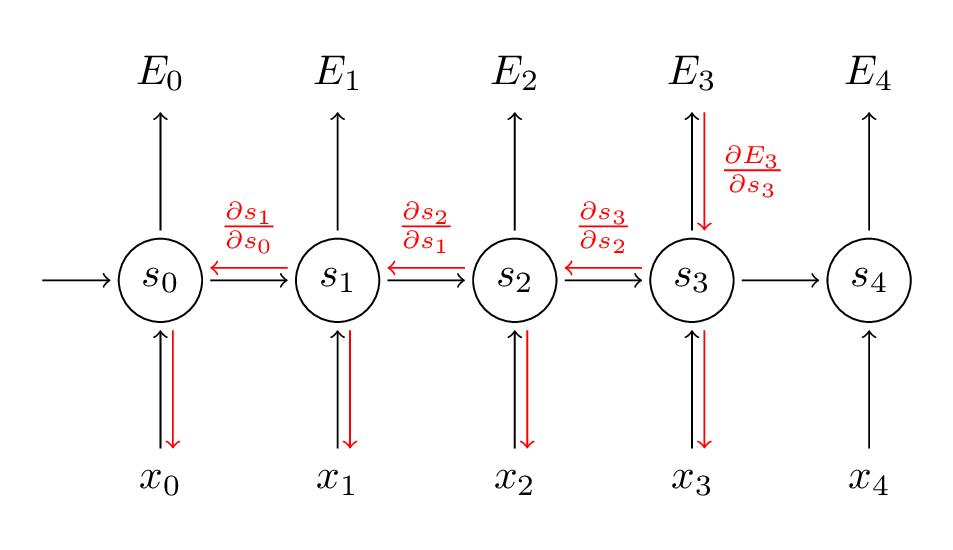

## Different Types of RNNs


#### 1. **One-to-One RNN** (기본적인 형태)
- **입력**: 하나의 데이터 포인트 \( x \).
- **출력**: 하나의 예측값 \( y \).
- **예시**: 이미지 분류.
- **특징**: 전통적인 피드포워드 신경망과 유사하지만, 시간 의존성이 필요 없는 경우에 사용된다.

#### 2. **One-to-Many RNN**
- **입력**: 하나의 데이터 포인트 \( x \).
- **출력**: 시퀀스 데이터 \( y_1, y_2, \dots, y_T \).
- **예시**: 음악 생성, 이미지 캡셔닝.
- **특징**: 단일 입력을 받아 여러 출력 시퀀스를 생성하는 데 사용된다.

#### 3. **Many-to-One RNN**
- **입력**: 시퀀스 데이터 \( x_1, x_2, \dots, x_T \).
- **출력**: 하나의 예측값 \( y \).
- **예시**: 감정 분석(입력 문장에서 감정을 분류), 문서 분류.
- **특징**: 시퀀스 데이터를 입력으로 받아 하나의 예측값을 생성하는 방식이다.

#### 4. **Many-to-Many RNN (동일한 길이)**
- **입력**: 시퀀스 데이터 \( x_1, x_2, \dots, x_T \).
- **출력**: 동일한 길이의 시퀀스 \( y_1, y_2, \dots, y_T \).
- **예시**: 비디오 프레임 분류(각 프레임마다 분류 결과를 출력).
- **특징**: 입력과 출력 시퀀스의 길이가 같은 경우 사용된다.

#### 5. **Many-to-Many RNN (다른 길이)**
- **입력**: 시퀀스 데이터 \( x_1, x_2, \dots, x_T \).
- **출력**: 다른 길이의 시퀀스 \( y_1, y_2, \dots, y_T' \).
- **예시**: 기계 번역(입력 문장의 길이와 번역된 문장의 길이가 다름).
- **특징**: 입력 시퀀스와 출력 시퀀스의 길이가 다른 경우에 사용되며, 주로 **Encoder-Decoder 구조**에서 사용된다.

#### 6. **Bidirectional RNN**
- **입력**: 시퀀스 데이터 \( x_1, x_2, \dots, x_T \).
- **출력**: 시퀀스 데이터 \( y_1, y_2, \dots, y_T \) (입력과 동일하거나 다른 길이).
- **예시**: 음성 인식, 자연어 처리.
- **특징**: 입력 데이터를 순방향과 역방향으로 모두 처리하여 과거와 미래의 정보를 동시에 반영할 수 있다.

## Sampling Novel Sequences
- 시퀀스 생성에서는 모델이 학습된 데이터에 기반해 한 번에 한 요소씩 샘플링하여 시퀀스를 생성한다. 예를 들어, 텍스트 생성에서는 첫 번째 단어를 예측하고, 그 단어를 기반으로 두 번째 단어를 예측하는 식이다.
- 샘플링 전략은 모델이 생성하는 시퀀스의 품질에 큰 영향을 미친다. 모델이 예측하는 확률 분포에서 가장 가능성이 높은 요소를 선택하거나, 확률적으로 랜덤하게 선택하는 방법을 사용할 수 있다.
불필요한 토큰의 제거: 예를 들어, 텍스트 생성에서 - <UNK>와 같은 알 수 없는 토큰이 생성되지 않도록 해당 토큰을 무시하고 다시 샘플링할 수 있다. 이 방식으로 모델은 더 유의미한 단어나 문장을 생성할 수 있게 된다.

> - RNN모델에서 무작위로 선택된 문장을 생성하는 방법 => 시퀀스 샘플링

1. 초기 토큰 입력: 샘플링을 시작하기 위해 모델에 처음에 입력할 단어, 문자, 또는 음표 등의 시퀀스 첫 번째 요소를 입력한다. 예를 들어, "A"나 "The" 같은 단어를 첫 입력으로 설정할 수 있다.

2. 모델의 예측: 모델은 이전 입력을 바탕으로 다음에 올 요소의 확률 분포를 예측한다. 이 확률 분포는 가능한 다음 단어(또는 음표 등)가 나올 확률을 나타낸다.

3. 확률적 선택: 이 확률 분포를 바탕으로 무작위로 다음 요소를 선택한다. 여기서 **탐욕적 샘플링(Greedy Sampling)**이나 확률적 샘플링이 사용된다. 탐욕적 샘플링은 가장 확률이 높은 요소를 고르는 방식이며, 확률적 샘플링은 확률 분포를 고려해 무작위로 선택하는 방식이다.

4. 연속적인 샘플링: 새로 선택된 요소를 다시 입력으로 사용하여, 다음 요소를 계속 예측하고 샘플링하는 과정을 반복한다.

5. 종료 조건: 모델이 종료 토큰(예: <EOS>)을 예측하거나 지정된 시퀀스 길이에 도달하면 샘플링을 종료한다.

## Vanishing Gradients with RNNs
- RNN에서는 입력 시퀀스를 처리할 때, 매 시간 단계마다 같은 가중치를 적용하여 정보를 순차적으로 전달한다. 그러나 역방향으로 기울기가 전파되면서 계속해서 작은 수가 곱해지면, 기울기가 점점 작아져 거의 0에 가까워진다. 이로 인해 초기 입력에 대한 정보는 학습되지 않고, RNN이 긴 시퀀스에서 초기 정보에 의존하는 학습을 효과적으로 수행하지 못하게 된다.

-> Gradient Explosion : RNN(Recurrent Neural Networks) 같은 깊은 네트워크에서 역전파를 통해 기울기가 계속 곱해질 때, 값이 매우 커져서 학습이 불안정해지는 문제를 의미 => 이 문제를 해결하기 위한 방법 중 하나가 Gradient Clipping(그래디언트 클리핑)으로, 기울기가 특정 임계값 이상으로 커지면 그 값을 조정하여 학습을 안정화하는 기법이다.

=> Gradient Vanishing problem이 gradient exploding 문제보다 더 해결이 어렵다. => gru, lstm...

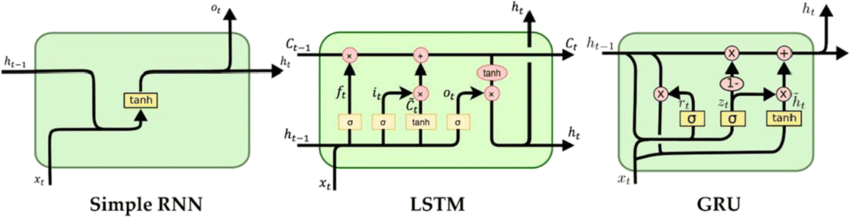

## Gated Recurrent Unit (GRU)


**GRU (Gated Recurrent Unit)**는 RNN의 변형으로, LSTM과 비슷한 기능을 하지만 구조가 더 단순하다. GRU는 업데이트 게이트와 리셋 게이트를 사용해 중요한 정보를 선택적으로 기억하거나 잊으며, 이는 장기 의존성을 효과적으로 처리하는 데 도움을 준다. GRU는 LSTM보다 파라미터가 적기 때문에 더 가볍고, 학습 속도가 빠른 경우가 많다.

## Long Short Term Memory (LSTM)

**LSTM (Long Short-Term Memory)**는 RNN의 변형으로, 장기 의존성 문제를 해결하기 위해 설계된 모델이다. LSTM은 정보의 흐름을 조절하기 위해 입력 게이트, 포겟 게이트(잊음 게이트), 출력 게이트를 사용한다. 이 게이트들은 데이터를 선택적으로 기억하거나 잊게 함으로써, 중요한 정보는 오랫동안 유지하고, 불필요한 정보는 제거한다. LSTM은 특히 긴 시퀀스 데이터(예: 텍스트, 시계열) 처리에 뛰어난 성능을 보인다. 하지만 그 구조가 GRU에 비해 복잡하고, 학습에 필요한 계산량이 더 크다.

## Bidirectional RNN

- He said, “Teddy Roosevelt was a great President.”

- He said, “Teddy bears are on sale!

- RNN의 한계 : 앞의 단어만을 보고 예측을 수행하기에 첫 번째 문장에서의 teady와 두 번째 문장에서의 teady를 구별할 수 없다.

Bidirectional RNN은 시퀀스를 양방향으로 처리하는 RNN 구조로, 순방향과 역방향의 두 개의 RNN을 동시에 사용한다. 이는 입력 데이터의 과거 정보뿐만 아니라 미래 정보까지 고려할 수 있게 하여 더 정확한 예측을 가능하게 한다. 특히 자연어 처리와 같은 문제에서 문맥을 더 잘 이해할 수 있도록 도와준다. 단점은 더 많은 계산량이 필요하다는 점이다.

# NATURAL LANGUAGE PROCESSING & WORD EMBEDDINGS

### 1. **단어 임베딩 사용(Using Word Embeddings)**
   - 단어 임베딩은 단어를 고차원 벡터로 표현하는 방법으로, 단어들 간의 의미적 관계를 벡터 공간에서 나타냄.
   - 전통적인 원핫 인코딩과 달리, 유사한 의미를 가진 단어들은 임베딩 벡터가 가깝게 위치함.
   - 이는 기계 번역, 감정 분석 등 다양한 자연어 처리 작업에서 단어 간 의미적 유사성을 파악하는 데 유용함.
   - Word2Vec, GloVe 같은 기법으로 사전 학습된 임베딩을 사용할 수 있음.

### 2. **단어 임베딩의 속성(Properties of Word Embeddings)**
   - 임베딩 벡터는 **유사한 단어**들이 **비슷한 위치**에 위치하도록 학습됨.
   - 벡터 간의 **덧셈과 뺄셈**을 통해 단어 간 관계를 파악할 수 있음 (예: "king - man + woman ≈ queen").
   - 단어 간의 **의미적 계층 구조**나 문맥을 임베딩 벡터를 통해 표현할 수 있음.
   - 임베딩의 이러한 속성은 모델이 복잡한 언어 패턴을 이해하는 데 큰 도움을 줌.

### 3. **임베딩 행렬(Embedding Matrix)**
   - 임베딩 행렬은 모델에서 사용하는 모든 단어의 임베딩 벡터를 모아 놓은 행렬임.
   - 입력 단어의 원핫 인코딩을 통해 해당 단어의 임베딩 벡터를 이 행렬에서 추출함.
   - 사전 학습된 임베딩을 불러오거나, 모델 학습 중에 임베딩 행렬을 업데이트할 수 있음.
   - 이 행렬은 단어 임베딩이 모델에 어떻게 연결되는지를 결정함.

### 4. **단어 임베딩 학습(Learning Word Embeddings)**
   - 두 가지 방식으로 단어 임베딩을 학습할 수 있음: **사전 학습**과 **태스크별 학습**.
   - Word2Vec, GloVe 같은 방법으로 대규모 코퍼스에서 사전 학습한 임베딩을 사용할 수 있음.
   - 또는 모델을 특정 태스크에 맞춰 학습할 때 임베딩 행렬을 업데이트할 수 있음.
   - 이를 통해 단어의 의미와 문맥을 반영한 임베딩 벡터를 생성함.

### 5. **Word2Vec**
   - Word2Vec은 단어 임베딩을 학습하는 대표적인 기법으로, **Skip-Gram**과 **CBOW(Continuous Bag of Words)** 두 가지 방식이 있음.
   - Skip-Gram은 중심 단어로 주변 단어를 예측하고, CBOW는 주변 단어들로 중심 단어를 예측하는 방식.
   - 이 방식은 단어 간 **공동 출현 패턴**을 학습하여 의미적으로 유사한 단어들이 가까운 벡터로 표현되도록 함.
   - Word2Vec은 자연어 처리에서 자주 사용되는 강력한 임베딩 학습 방법임.

### 6. **Negative Sampling**
   - Negative Sampling은 Word2Vec의 학습을 가속화하기 위한 방법으로, 모든 단어 쌍을 고려하지 않고 일부 **부정 예시(negative examples)**만을 사용하여 학습함.
   - 이를 통해 계산량을 줄이고, 대규모 데이터셋에서도 효율적인 학습이 가능함.
   - 긍정적 예시(실제로 공동 출현한 단어들)와 부정적 예시(공동 출현하지 않은 단어들)의 차이를 학습하여 임베딩 벡터를 업데이트함.
   - 특히 큰 어휘 집합을 다룰 때 매우 유용함.

### 7. **GloVe 단어 벡터(GloVe Word Vectors)**
   - GloVe는 전역적인 단어 공동 출현 정보를 기반으로 단어 임베딩을 학습하는 기법임.
   - Word2Vec이 국지적인 맥락을 학습하는 반면, GloVe는 **전체 코퍼스에서 단어의 전역적인 공동 출현 빈도**를 분석함.
   - 이 방식으로 학습된 벡터는 전역적인 의미 관계를 잘 반영하며, Word2Vec과 비교하여 더 균형 잡힌 임베딩을 제공함.
   - 자연어 처리에서 널리 사용되는 대표적인 임베딩 기법 중 하나임.

### 8. **감정 분류(Sentiment Classification)**
   - 감정 분류는 텍스트의 감정(긍정, 부정, 중립 등)을 예측하는 작업으로, 단어 임베딩을 활용하면 더욱 정교한 예측이 가능함.
   - 임베딩 벡터는 단어 간의 의미적 유사성을 반영하기 때문에, 특정 감정과 관련된 단어들을 효과적으로 그룹화할 수 있음.
   - 이 과정에서 텍스트 내의 미묘한 감정 표현도 포착할 수 있어 감정 분석 모델의 성능을 향상시킴.
   - 영화 리뷰, 소셜 미디어 분석 등 다양한 분야에서 사용됨.

### 9. **단어 임베딩 편향 제거(Debiasing Word Embeddings)**
   - 단어 임베딩은 학습 데이터의 편향을 반영할 수 있으며, 이를 **제거하거나 완화**하는 작업이 필요함.
   - 예를 들어, 성별이나 인종과 관련된 편향이 임베딩 벡터에 나타날 수 있음.
   - 이를 해결하기 위해 **중립화(Neutralization)**와 **동등화(Equalization)** 같은 기법을 사용해 특정 편향 방향을 제거하거나 줄임.
   - 공정하고 윤리적인 AI 모델 개발을 위해 중요한 과정임.